In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
food = pd.read_csv('food.csv')
ent = pd.read_csv('entertainment.csv')
transp = pd.read_csv('transport.csv')
expense = pd.read_csv('expense.csv')
school = pd.read_csv('school.csv')
apartment = pd.read_csv('apartment.csv')
car = pd.read_csv('car.csv')

In [4]:
food.Capital = pd.Categorical(food.Capital)
food.Country = pd.Categorical(food.Country)
food['capital_code'] = food.Capital.cat.codes
food['country_code'] = food.Capital.cat.codes
food

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),...,Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Country,Capital,capital_code,country_code
0,7.34,29.35,4.40,0.76,0.53,0.98,0.71,1.18,7.60,0.63,...,1.96,0.92,1.91,0.89,0.48,7.18,Russia,Saint Petersburg,119,119
1,4.58,15.28,3.82,0.64,0.24,0.71,0.36,1.62,5.32,0.33,...,1.84,1.30,0.80,1.91,0.62,9.73,Turkey,Istanbul,63,63
2,3.06,12.22,3.06,0.61,0.22,0.65,0.38,1.51,4.97,0.29,...,1.56,1.31,0.70,1.78,0.58,8.61,Turkey,Izmir,64,64
3,12.00,65.00,8.00,2.66,1.89,0.96,2.27,2.02,6.87,1.54,...,3.87,2.13,2.91,1.61,1.25,12.34,Finland,Helsinki,57,57
4,4.67,20.74,4.15,0.64,0.44,0.68,0.33,1.11,5.79,0.59,...,1.25,0.93,1.56,1.37,0.59,5.37,Moldova,Chisinau,38,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,10.22,49.54,7.12,1.91,1.70,0.90,1.88,2.85,6.12,1.28,...,2.63,1.58,3.06,2.20,1.78,9.42,Australia,Melbourne,85,85
156,12.43,56.55,7.32,1.79,1.62,1.03,1.76,2.59,6.52,1.68,...,2.86,1.96,2.40,2.11,1.29,9.49,Australia,Perth,105,105
157,11.81,54.37,7.15,1.99,1.68,0.90,1.85,2.79,7.68,1.29,...,2.48,1.65,3.01,2.17,1.72,11.24,Australia,Sydney,134,134
158,2.81,14.06,3.38,0.32,0.19,0.81,0.51,1.02,3.68,0.26,...,1.45,0.66,0.39,0.66,0.31,8.37,Egypt,Alexandria,3,3


<AxesSubplot: >

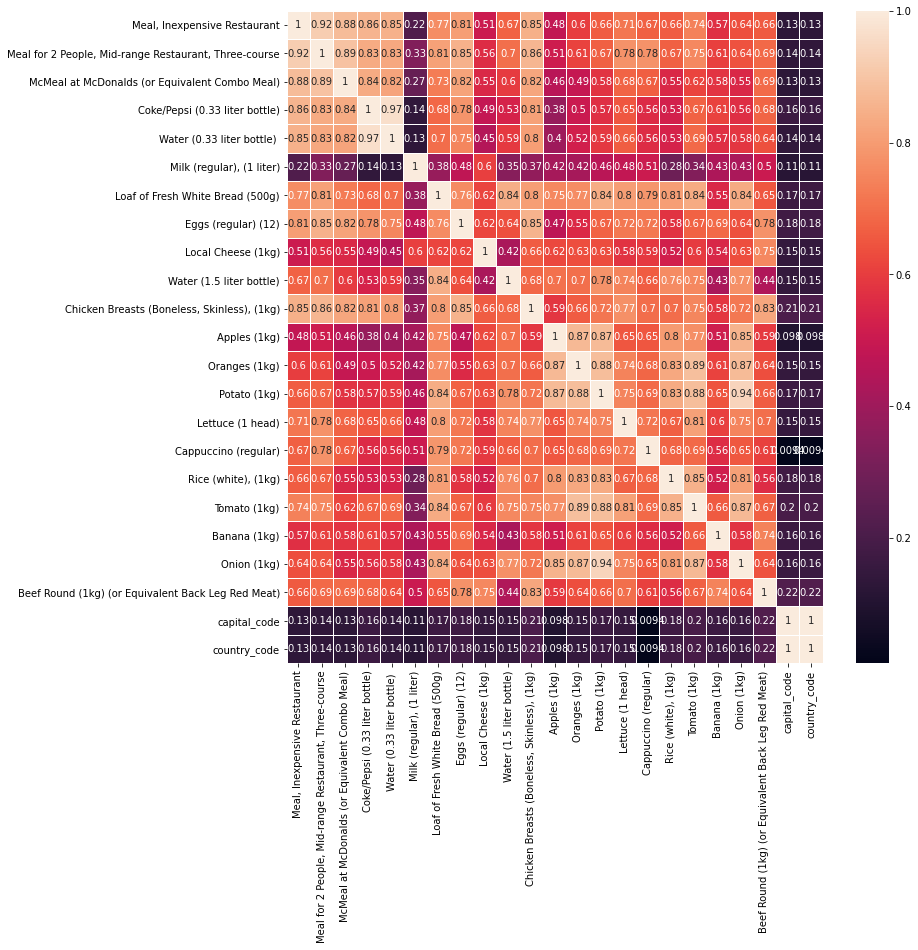

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(food.corr(),annot=True,linewidths=.5)


In [8]:
from sklearn.metrics import classification_report,r2_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler

le = LabelEncoder()
food['Country'] = le.fit_transform(food['Country'])
food['Capital'] = le.fit_transform(food['Capital'])

sm = SMOTE(random_state=123)

x = food.drop(['country_code','capital_code','Country','Capital'],axis=1)
y = food['Country']

x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [9]:
ros = RandomOverSampler(random_state=123)
x_resampled, y_resampled = ros.fit_resample(x, y)

x_sm ,y_sm = sm.fit_resample(x_resampled,y_resampled)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_sm,y_sm)

KNeighborsClassifier()

In [10]:
model.score(x_test,y_test)

0.9375

In [11]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print(r2_score(y_test,y_pred_test))
print(r2_score(y_train,y_pred_train))

0.7509413067552603
0.5456760219010028


In [12]:
accuracy_score(y_train,y_pred_train)

0.859375

In [13]:
# After you make the predictions using the model
predictions = model.predict(x_test)

# Get the inverse transform of the labels
predictions_country = le.inverse_transform(predictions)

# Now the predictions_country will have the country names
print(predictions_country)

[11 70 31 13 10 57 28 15 50 10 56 11 10 65 14 68 39 31  5 47 18 41 11 26
 45 78 61 55 51 76  2 33]


In [14]:
food_countries = le.transform(food['Country'])
food_countries

array([60, 74, 74, 23, 46, 35, 21,  8,  5, 45, 49, 81, 81, 45, 35, 45, 60,
        8, 75, 75, 11, 73, 11, 50, 61, 75, 24, 50, 10, 27, 11, 10, 50, 10,
       61, 50, 26, 41, 78, 62, 11, 51, 47, 11, 36, 11, 11, 78, 78, 38, 52,
       26, 63, 78, 16, 26, 56, 40, 56, 12, 39, 76, 78, 25, 76, 14, 17, 26,
       56, 78, 77, 78, 53, 66, 56, 17, 56, 44, 78, 18, 64, 31, 68, 31, 42,
       27, 78, 28, 78, 57, 13, 65,  0, 57, 65, 29, 42, 65, 67, 78, 78, 54,
       78, 59, 59, 80, 31, 59, 67, 22, 31, 59, 31, 58, 31, 31, 67,  4, 31,
       79, 34, 59, 71, 31, 43, 13, 72, 31, 30, 37, 31, 69,  1,  6, 15, 48,
       56, 11,  9, 69, 33, 60, 19,  3, 70,  2, 55,  3, 32, 74, 75, 60, 74,
        7, 34,  3,  3,  3, 21, 20], dtype=int64)

In [20]:
min_ = food.min()
avg = food.mean()
max_ = food.max()


KeyError: "None of [Float64Index([1.49, 7.59, 2.67, 0.29, 0.14, 0.39,  0.1, 0.75, 2.96, 0.22, 2.35,\n              0.56, 0.39, 0.26,  0.2, 0.67, 0.52, 0.35, 0.48, 0.25, 4.15,  0.0,\n               0.0,  0.0,  0.0],\n             dtype='float64')] are in the [columns]"